# 第7章: 単語ベクトル

単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

In [1]:
import numpy as np
import os
import pandas as pd
import pickle

## 60. 単語ベクトルの読み込みと表示

Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [2]:
# !pip install --upgrade gensim

In [3]:
from gensim.models import KeyedVectors

In [4]:
# 学習済み単語ベクトル
vector_path = os.path.join(os.getcwd(), '../data/GoogleNews-vectors-negative300.bin')

In [5]:
# 読み込み
wv_from_bin = KeyedVectors.load_word2vec_format(vector_path, binary=True)

In [6]:
wv_from_bin['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

## 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [7]:
wv_from_bin['U.S.']

array([ 1.34887695e-02, -5.92041016e-03,  1.03515625e-01,  1.22070312e-01,
       -1.87500000e-01, -6.49414062e-02, -1.62109375e-01, -2.30712891e-02,
        9.08203125e-02, -8.98437500e-02, -1.86523438e-01,  3.93676758e-03,
        1.66015625e-01, -4.37011719e-02, -1.09375000e-01, -5.88378906e-02,
       -1.45507812e-01, -4.37011719e-02, -3.36914062e-02, -7.61718750e-02,
       -1.97265625e-01,  6.98242188e-02, -1.42578125e-01, -1.19628906e-01,
       -1.31225586e-02,  1.21582031e-01, -6.07910156e-02, -1.15356445e-02,
       -5.12695312e-02,  2.30468750e-01,  2.75390625e-01, -2.41210938e-01,
       -1.66015625e-01, -1.32812500e-01,  3.68652344e-02, -5.44433594e-02,
       -1.62353516e-02, -8.00781250e-02, -1.29394531e-02,  3.11279297e-02,
        3.54003906e-03, -3.56445312e-02,  1.63085938e-01,  1.24511719e-01,
       -6.98242188e-02,  2.08007812e-01, -3.49121094e-02,  1.87500000e-01,
       -5.27343750e-02,  1.13281250e-01,  2.27050781e-02,  1.18652344e-01,
        4.27246094e-02, -

In [9]:
wv_from_bin.similarity('United_States', 'U.S.')

0.73107743

## 62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [11]:
result = wv_from_bin.similar_by_word('United_States')

In [12]:
for k, s in result[:10]:
    print(k, s)

Unites_States 0.7877248525619507
Untied_States 0.7541370391845703
United_Sates 0.74007248878479
U.S. 0.7310774326324463
theUnited_States 0.6404393911361694
America 0.6178410053253174
UnitedStates 0.6167312264442444
Europe 0.6132988929748535
countries 0.6044804453849792
Canada 0.6019070148468018


## 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [7]:
result = wv_from_bin.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'])

In [8]:
for k, s in result[:10]:
    print(k, s)

Greece 0.6898480653762817
Aristeidis_Grigoriadis 0.5606849193572998
Ioannis_Drymonakos 0.555290937423706
Greeks 0.5450686812400818
Ioannis_Christou 0.5400862693786621
Hrysopiyi_Devetzi 0.5248445272445679
Heraklio 0.5207759141921997
Athens_Greece 0.516880989074707
Lithuania 0.5166865587234497
Iraklion 0.5146791338920593


## 64. アナロジーデータでの実験
[単語アナロジーの評価データ](http://download.tensorflow.org/data/questions-words.txt)をダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

### データ準備

In [6]:
# 単語アナロジーの評価データ
word_valid_path = os.path.join(os.getcwd(), '../data/questions-words.txt')

In [7]:
# 読み込み
with open(word_valid_path) as f:
    lines = f.readlines()

In [8]:
data_list = []
for line in lines:
    line = line.split()
    if line[0] == ':':
        group = line[1]
    else:
        line.append(group)
        data_list.append(line)
        
df = pd.DataFrame(data_list)
df.head(3)

,0,1,2,3,4
0,Athens,Greece,Baghdad,Iraq,capital-common-countries
1,Athens,Greece,Bangkok,Thailand,capital-common-countries
2,Athens,Greece,Beijing,China,capital-common-countries


In [9]:
# 列名変更
df.columns = ['vec1', 'vec2', 'vec3', 'vec4', 'group']
df.head(3)

,vec1,vec2,vec3,vec4,group
0,Athens,Greece,Baghdad,Iraq,capital-common-countries
1,Athens,Greece,Bangkok,Thailand,capital-common-countries
2,Athens,Greece,Beijing,China,capital-common-countries


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19544 entries, 0 to 19543
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vec1    19544 non-null  object
 1   vec2    19544 non-null  object
 2   vec3    19544 non-null  object
 3   vec4    19544 non-null  object
 4   group   19544 non-null  object
dtypes: object(5)
memory usage: 763.6+ KB


### 関数準備

In [11]:
# vec2 - vec1 + vec3
def two_pos_one_neg(row):
    return wv_from_bin.most_similar(positive=[row['vec2'], row['vec3']], negative=[row['vec1']])[0]

pd.DataFrame([
    {
        'vec1': 'Madrid',
        'vec2': 'Spain',
        'vec3': 'Athens',
    },
    {
        'vec1': 'Athens',
        'vec2': 'Greece',
        'vec3': 'Baghdad',
    },
]).apply(two_pos_one_neg, axis=1, result_type='expand')

,0,1
0,Greece,0.689848
1,Iraqi,0.635187


### 適用

In [12]:
%%time
# 試しに何行かにやってみて、時間見てみる
(
    df
    .loc[:100, :]
    .apply(two_pos_one_neg, axis=1, result_type='expand')
    .head(3)
)

Wall time: 16.8 s


,0,1
0,Iraqi,0.635187
1,Thailand,0.713767
2,China,0.723578


In [13]:
len(df)

19544

In [14]:
# 単純計算で16.8s / 100 * 16544 = 3,283s = 約55分かかる
# 類似度が最も高い単語と，その類似度
df_ans_cos = df.apply(two_pos_one_neg, axis=1, result_type='expand')

In [15]:
len(df_ans_cos)

19544

In [16]:
df_ans_cos.head(3)

,0,1
0,Iraqi,0.635187
1,Thailand,0.713767
2,China,0.723578


In [17]:
# 列名変更
df_ans_cos.columns = ['answer', 'cosine_similarity']
df_ans_cos.head(3)

,answer,cosine_similarity
0,Iraqi,0.635187
1,Thailand,0.713767
2,China,0.723578


In [18]:
# 各事例の末尾に追記
df = pd.concat([df, df_ans_cos], axis=1)

In [19]:
df.head(3)

,vec1,vec2,vec3,vec4,group,answer,cosine_similarity
0,Athens,Greece,Baghdad,Iraq,capital-common-countries,Iraqi,0.635187
1,Athens,Greece,Bangkok,Thailand,capital-common-countries,Thailand,0.713767
2,Athens,Greece,Beijing,China,capital-common-countries,China,0.723578


In [20]:
# 時間かかるので結果保存
with open('df_64.pickle', mode="wb") as f:
    pickle.dump(df, f)

## 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [3]:
# 読み込み
with open('df_64.pickle', mode="rb") as f:
    df = pickle.load(f)

In [4]:
df.head(3)

,vec1,vec2,vec3,vec4,group,answer,cosine_similarity
0,Athens,Greece,Baghdad,Iraq,capital-common-countries,Iraqi,0.635187
1,Athens,Greece,Bangkok,Thailand,capital-common-countries,Thailand,0.713767
2,Athens,Greece,Beijing,China,capital-common-countries,China,0.723578


In [5]:
# グループごとの件数
df.groupby('group')['vec1'].count()

group
capital-common-countries        506
capital-world                  4524
city-in-state                  2467
currency                        866
family                          506
gram1-adjective-to-adverb       992
gram2-opposite                  812
gram3-comparative              1332
gram4-superlative              1122
gram5-present-participle       1056
gram6-nationality-adjective    1599
gram7-past-tense               1560
gram8-plural                   1332
gram9-plural-verbs              870
Name: vec1, dtype: int64

In [8]:
# syn
df['group'].apply(lambda x: x.startswith('gram')).sum()

10675

### 意味的アナロジー（semantic analogy）

In [10]:
df_sem = df[(~df['group'].apply(lambda x: x.startswith('gram')))]

In [11]:
# 正解率
(df_sem['vec4'] == df_sem['answer']).sum() / len(df_sem)

0.7308602999210734

### 文法的アナロジー（syntactic analogy）

In [12]:
df_syn = df[df['group'].apply(lambda x: x.startswith('gram'))]

In [13]:
# 正解率
(df_syn['vec4'] == df_syn['answer']).sum() / len(df_syn)

0.7400468384074942

## 66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [7]:
from scipy.stats import spearmanr

### データ読み込み

In [8]:
# 学習済み単語ベクトル
combined_path = os.path.join(os.getcwd(), '../data/combined.csv')

In [11]:
# 読み込み
df = pd.read_csv(combined_path)
df.head(3)

,Word 1,Word 2,Human (mean)
0,love,sex,6.77
1,tiger,cat,7.35
2,tiger,tiger,10.00


### 類似度算出

In [17]:
# Word 1とWord 2の類似度
def get_similarity(row):
    return wv_from_bin.similarity(row['Word 1'], row['Word 2'])

pd.DataFrame([
    {
        'Word 1': 'love',
        'Word 2': 'sex',
    },
    {
        'Word 1': 'tiger',
        'Word 2': 'cat',
    },
]).apply(get_similarity, axis=1)

0    0.263938
1    0.517296
dtype: float64

In [19]:
df['vector_score'] = df.apply(get_similarity, axis=1)

In [20]:
df.head(3)

,Word 1,Word 2,Human (mean),vector_score
0,love,sex,6.77,0.263938
1,tiger,cat,7.35,0.517296
2,tiger,tiger,10.00,1.000000


### ランキング付け

In [24]:
df['human_rank'] = df['Human (mean)'].rank(ascending=False)
df['vector_rank'] = df['vector_score'].rank(ascending=False)

### スピアマン相関係数を計算

In [25]:
correlation, pvalue = spearmanr(df['human_rank'], df['vector_rank'])

In [26]:
print(correlation)

0.7000166486272194


## 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

### 国名に関する単語ベクトル抽出

うまい抽出方法なさそうなので、[【言語処理100本ノック 2020】第7章: 単語ベクトル](https://qiita.com/yamaru/items/822af1f7f77666381e20)を参考にする

In [14]:
# 読み込み
with open('df_64.pickle', mode="rb") as f:
    df = pickle.load(f)
df.head(3)

,vec1,vec2,vec3,vec4,group,answer,cosine_similarity
0,Athens,Greece,Baghdad,Iraq,capital-common-countries,Iraqi,0.635187
1,Athens,Greece,Bangkok,Thailand,capital-common-countries,Thailand,0.713767
2,Athens,Greece,Beijing,China,capital-common-countries,China,0.723578


In [15]:
s_country = (
    pd.concat([
        df.loc[df['group'] == 'capital-common-countries', 'vec2'],
        df.loc[df['group'] == 'capital-world', 'vec2'],
        df.loc[df['group'] == 'currency', 'vec1'],
        df.loc[df['group'] == 'gram6-nationality-adjective', 'vec1'],
    ])
    .drop_duplicates()
)
s_country

0             Greece
22              Iraq
44          Thailand
66             China
88           Germany
            ...     
5839             USA
14573       Colombia
14885        Iceland
15002         Israel
15314    Netherlands
Length: 129, dtype: object

In [16]:
def get_vector(name):
    return pd.Series(wv_from_bin[name])

pd.DataFrame(
    pd.Series(['Greece', 'Iraq']).apply(get_vector)
)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.472656,0.007019,0.059082,0.090332,0.039551,-0.058594,0.060059,-0.257812,-0.241211,-0.045898,...,0.055908,0.021118,-0.117676,-0.052246,0.07373,0.462891,-0.425781,0.024658,0.090332,0.023193
1,0.191406,0.125000,-0.065430,0.060059,-0.285156,-0.102539,0.117188,-0.351562,-0.095215,0.200195,...,-0.100586,-0.077148,-0.123047,0.193359,-0.15332,0.089355,-0.173828,-0.054688,0.302734,0.105957


In [18]:
df_country_vector = (
    pd.concat([
        s_country,
        s_country.apply(get_vector),
    ], axis=1)
    .reset_index(drop=True)
)
df_country_vector.columns = range(df_country_vector.shape[1])
df_country_vector.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,Greece,0.472656,0.007019,0.059082,0.090332,0.039551,-0.058594,0.060059,-0.257812,-0.241211,...,0.055908,0.021118,-0.117676,-0.052246,0.073730,0.462891,-0.425781,0.024658,0.090332,0.023193
1,Iraq,0.191406,0.125000,-0.065430,0.060059,-0.285156,-0.102539,0.117188,-0.351562,-0.095215,...,-0.100586,-0.077148,-0.123047,0.193359,-0.153320,0.089355,-0.173828,-0.054688,0.302734,0.105957
2,Thailand,0.109863,-0.117188,0.010010,0.238281,-0.193359,0.060303,0.059326,-0.402344,-0.139648,...,-0.035889,0.146484,-0.110352,-0.082520,-0.073242,0.076172,-0.326172,-0.048584,0.130859,0.241211
3,China,-0.073242,0.135742,0.108887,0.083008,-0.127930,-0.227539,0.151367,-0.045654,-0.065430,...,0.140625,0.087402,0.152344,0.079590,0.006348,-0.037842,-0.183594,0.137695,0.093750,-0.079590
4,Germany,0.259766,0.140625,0.247070,0.009583,-0.250000,-0.082520,-0.099121,-0.353516,-0.148438,...,-0.060791,0.118164,-0.064453,0.113770,-0.172852,0.171875,-0.194336,0.008179,0.068359,-0.141602


In [19]:
# 保存
with open('df_67.pickle', mode="wb") as f:
    pickle.dump(df_country_vector, f)

### k-meansクラスタリング

In [21]:
# 読み込み
with open('df_67.pickle', mode="rb") as f:
    df_country_vector = pickle.load(f)
df_country_vector.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,Greece,0.472656,0.007019,0.059082,0.090332,0.039551,-0.058594,0.060059,-0.257812,-0.241211,...,0.055908,0.021118,-0.117676,-0.052246,0.073730,0.462891,-0.425781,0.024658,0.090332,0.023193
1,Iraq,0.191406,0.125000,-0.065430,0.060059,-0.285156,-0.102539,0.117188,-0.351562,-0.095215,...,-0.100586,-0.077148,-0.123047,0.193359,-0.153320,0.089355,-0.173828,-0.054688,0.302734,0.105957
2,Thailand,0.109863,-0.117188,0.010010,0.238281,-0.193359,0.060303,0.059326,-0.402344,-0.139648,...,-0.035889,0.146484,-0.110352,-0.082520,-0.073242,0.076172,-0.326172,-0.048584,0.130859,0.241211
3,China,-0.073242,0.135742,0.108887,0.083008,-0.127930,-0.227539,0.151367,-0.045654,-0.065430,...,0.140625,0.087402,0.152344,0.079590,0.006348,-0.037842,-0.183594,0.137695,0.093750,-0.079590
4,Germany,0.259766,0.140625,0.247070,0.009583,-0.250000,-0.082520,-0.099121,-0.353516,-0.148438,...,-0.060791,0.118164,-0.064453,0.113770,-0.172852,0.171875,-0.194336,0.008179,0.068359,-0.141602


In [22]:
from sklearn.cluster import KMeans

In [27]:
kmeans = KMeans(n_clusters=5, random_state=0)

In [28]:
kmeans.fit(df_country_vector.loc[:, 1:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [29]:
kmeans.labels_

array([3, 2, 2, 2, 3, 3, 2, 2, 2, 4, 3, 2, 2, 3, 3, 0, 3, 3, 3, 3, 3, 2,
       2, 1, 1, 1, 2, 2, 1, 4, 0, 1, 0, 0, 1, 1, 2, 0, 4, 0, 3, 3, 0, 3,
       1, 4, 0, 1, 3, 1, 2, 2, 2, 3, 0, 2, 1, 4, 1, 2, 1, 2, 1, 0, 1, 4,
       1, 1, 4, 3, 3, 1, 1, 4, 2, 4, 1, 0, 1, 1, 4, 2, 1, 4, 1, 3, 1, 2,
       4, 3, 4, 2, 0, 4, 4, 0, 0, 2, 2, 0, 0, 0, 4, 2, 0, 1, 1, 3, 3, 3,
       2, 0, 3, 1, 0, 3, 4, 4, 2, 3, 2, 2, 2, 4, 3, 4, 3, 2, 3])

In [33]:
df_country_vector = (
    pd.concat([
        df_country_vector,
        pd.Series(kmeans.labels_, name='label'),
    ], axis=1)
)
df_country_vector.head()

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,label
0,Greece,0.472656,0.007019,0.059082,0.090332,0.039551,-0.058594,0.060059,-0.257812,-0.241211,...,0.021118,-0.117676,-0.052246,0.073730,0.462891,-0.425781,0.024658,0.090332,0.023193,3
1,Iraq,0.191406,0.125000,-0.065430,0.060059,-0.285156,-0.102539,0.117188,-0.351562,-0.095215,...,-0.077148,-0.123047,0.193359,-0.153320,0.089355,-0.173828,-0.054688,0.302734,0.105957,2
2,Thailand,0.109863,-0.117188,0.010010,0.238281,-0.193359,0.060303,0.059326,-0.402344,-0.139648,...,0.146484,-0.110352,-0.082520,-0.073242,0.076172,-0.326172,-0.048584,0.130859,0.241211,2
3,China,-0.073242,0.135742,0.108887,0.083008,-0.127930,-0.227539,0.151367,-0.045654,-0.065430,...,0.087402,0.152344,0.079590,0.006348,-0.037842,-0.183594,0.137695,0.093750,-0.079590,2
4,Germany,0.259766,0.140625,0.247070,0.009583,-0.250000,-0.082520,-0.099121,-0.353516,-0.148438,...,0.118164,-0.064453,0.113770,-0.172852,0.171875,-0.194336,0.008179,0.068359,-0.141602,3


In [38]:
# 0: 東欧
# 1: アフリカ
# 2: アジア
# 3: 西欧、北米
# 4: 中南米
for l in sorted(df_country_vector['label'].unique()):
    print(l)
    display(df_country_vector.loc[df_country_vector['label']==l, 0])

0


15           Russia
30     Turkmenistan
32       Kazakhstan
33       Azerbaijan
37           Serbia
39       Kyrgyzstan
42          Romania
46          Moldova
54       Tajikistan
63          Ukraine
77          Belarus
92           Latvia
95        Macedonia
96         Bulgaria
99          Estonia
100      Uzbekistan
101         Georgia
104         Albania
111       Lithuania
114         Armenia
Name: 0, dtype: object

1


23        Nigeria
24          Ghana
25        Algeria
28     Madagascar
31        Eritrea
34           Mali
35         Gambia
44        Burundi
47         Guinea
49        Senegal
56       Botswana
58       Zimbabwe
60         Uganda
62          Sudan
64         Rwanda
66          Gabon
67         Malawi
71         Angola
72         Zambia
76     Mozambique
78        Somalia
79        Liberia
82          Kenya
84          Niger
86     Mauritania
105         Libya
106       Tunisia
113       Namibia
Name: 0, dtype: object

2


1             Iraq
2         Thailand
3            China
6            Egypt
7        Australia
8          Vietnam
11        Pakistan
12     Afghanistan
21            Iran
22           Japan
26          Jordan
27          Turkey
36         Lebanon
50           Syria
51      Bangladesh
52           Qatar
55          Tuvalu
59       Indonesia
61           Nepal
74         Bahrain
81            Oman
87       Greenland
91         Morocco
97            Fiji
98          Taiwan
103         Bhutan
110           Laos
118       Cambodia
120          India
121          Korea
122       Malaysia
127         Israel
Name: 0, dtype: object

3


0             Greece
4            Germany
5        Switzerland
10           Finland
13           England
14             Spain
16            Norway
17            Canada
18            France
19             Italy
20            Sweden
40          Slovakia
41           Belgium
43           Hungary
48           Denmark
53           Ireland
69          Portugal
70          Slovenia
85            Cyprus
89        Montenegro
107    Liechtenstein
108            Malta
109          Austria
112           Poland
115          Croatia
119           Europe
124              USA
126          Iceland
128      Netherlands
Name: 0, dtype: object

4


9             Cuba
29           Samoa
38          Belize
45       Venezuela
57          Guyana
65         Jamaica
68            Peru
73       Nicaragua
75     Philippines
80         Uruguay
83         Bahamas
88        Suriname
90         Ecuador
93        Dominica
94           Chile
102       Honduras
116      Argentina
117         Brazil
123         Mexico
125       Colombia
Name: 0, dtype: object

## 68. Ward法によるクラスタリング

国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

In [60]:
# 読み込み
with open('df_67.pickle', mode="rb") as f:
    df_country_vector = pickle.load(f)
df_country_vector.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,Greece,0.472656,0.007019,0.059082,0.090332,0.039551,-0.058594,0.060059,-0.257812,-0.241211,...,0.055908,0.021118,-0.117676,-0.052246,0.073730,0.462891,-0.425781,0.024658,0.090332,0.023193
1,Iraq,0.191406,0.125000,-0.065430,0.060059,-0.285156,-0.102539,0.117188,-0.351562,-0.095215,...,-0.100586,-0.077148,-0.123047,0.193359,-0.153320,0.089355,-0.173828,-0.054688,0.302734,0.105957
2,Thailand,0.109863,-0.117188,0.010010,0.238281,-0.193359,0.060303,0.059326,-0.402344,-0.139648,...,-0.035889,0.146484,-0.110352,-0.082520,-0.073242,0.076172,-0.326172,-0.048584,0.130859,0.241211
3,China,-0.073242,0.135742,0.108887,0.083008,-0.127930,-0.227539,0.151367,-0.045654,-0.065430,...,0.140625,0.087402,0.152344,0.079590,0.006348,-0.037842,-0.183594,0.137695,0.093750,-0.079590
4,Germany,0.259766,0.140625,0.247070,0.009583,-0.250000,-0.082520,-0.099121,-0.353516,-0.148438,...,-0.060791,0.118164,-0.064453,0.113770,-0.172852,0.171875,-0.194336,0.008179,0.068359,-0.141602


In [61]:
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [70]:
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')

In [71]:
clustering.fit(df_country_vector.loc[:, 1:])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0, linkage='ward',
                        memory=None, n_clusters=None)

In [72]:
clustering.labels_

array([113, 110,  83,  98, 124, 108, 109,  66,  67,  74, 127,  95,  73,
        64, 114, 107, 125,  71,  92, 103,  96, 101,  84, 100, 102,  97,
        91, 126,  48,  85,  76,  70, 111, 118,  99, 128,  36,  79,  77,
        49,  47, 121,  62,  88,  78,  50,  80,  89,  23,  72, 119,  82,
        87, 123,  90,  39,  63,  24, 115, 105, 116, 120, 106, 122,  65,
       104,  35,  60,  57,  61,  59,  45,  17,  44,  52,  29, 112, 117,
        81,  93,  94,  31,  75,  30,  11,  69,  43,  53,  40,  41,  68,
        54,  14,  46,  19,  51,  86,  37,  26,  42,  22,  33,  55,  58,
        32,  34,  21,  15,  25,  20,  12,  56,  27,  10,  28,  13,   6,
         5,  38,  18,  16,   9,   7,   2,   8,   4,   3,   1,   0],
      dtype=int64)

In [73]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

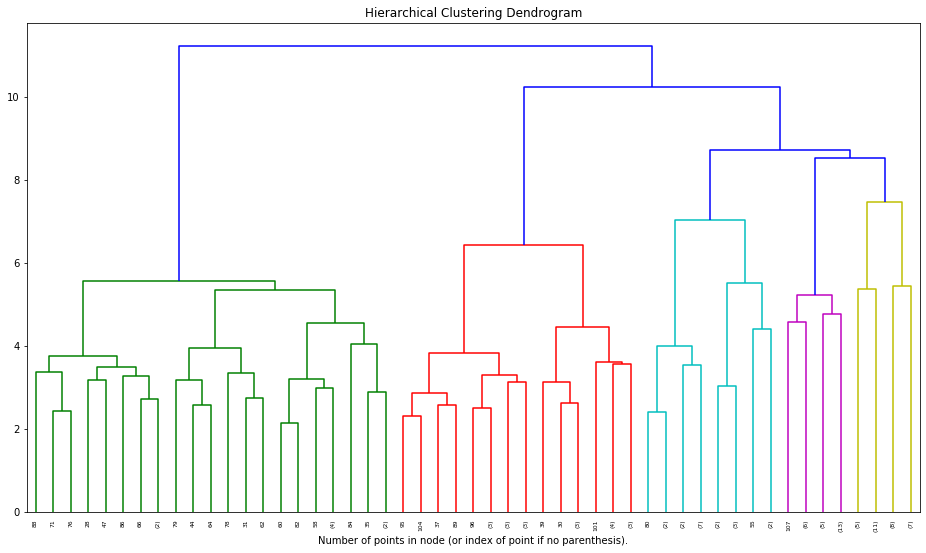

In [91]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.set_title('Hierarchical Clustering Dendrogram')
# plot the dendrogram
plot_dendrogram(clustering, truncate_mode='level', p=5)
ax.set_xlabel("Number of points in node (or index of point if no parenthesis).")

plt.show()

## 69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

In [101]:
# 読み込み
with open('df_67.pickle', mode="rb") as f:
    df_country_vector = pickle.load(f)
df_country_vector.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,Greece,0.472656,0.007019,0.059082,0.090332,0.039551,-0.058594,0.060059,-0.257812,-0.241211,...,0.055908,0.021118,-0.117676,-0.052246,0.073730,0.462891,-0.425781,0.024658,0.090332,0.023193
1,Iraq,0.191406,0.125000,-0.065430,0.060059,-0.285156,-0.102539,0.117188,-0.351562,-0.095215,...,-0.100586,-0.077148,-0.123047,0.193359,-0.153320,0.089355,-0.173828,-0.054688,0.302734,0.105957
2,Thailand,0.109863,-0.117188,0.010010,0.238281,-0.193359,0.060303,0.059326,-0.402344,-0.139648,...,-0.035889,0.146484,-0.110352,-0.082520,-0.073242,0.076172,-0.326172,-0.048584,0.130859,0.241211
3,China,-0.073242,0.135742,0.108887,0.083008,-0.127930,-0.227539,0.151367,-0.045654,-0.065430,...,0.140625,0.087402,0.152344,0.079590,0.006348,-0.037842,-0.183594,0.137695,0.093750,-0.079590
4,Germany,0.259766,0.140625,0.247070,0.009583,-0.250000,-0.082520,-0.099121,-0.353516,-0.148438,...,-0.060791,0.118164,-0.064453,0.113770,-0.172852,0.171875,-0.194336,0.008179,0.068359,-0.141602


In [102]:
from sklearn.manifold import TSNE

In [103]:
X_embedded = TSNE(n_components=2).fit_transform(df_country_vector.loc[:, 1:])

In [104]:
df_country_vector = (
    pd.concat([
        df_country_vector.loc[:, 0],
        pd.DataFrame(X_embedded),
    ], axis=1)
)
df_country_vector.columns = ['name', 'x', 'y']
df_country_vector.head()

,name,x,y
0,Greece,-4.309496,3.160314
1,Iraq,-9.474033,1.941489
2,Thailand,-0.073665,-6.442748
3,China,-2.637790,-4.199380
4,Germany,-0.622753,1.593884


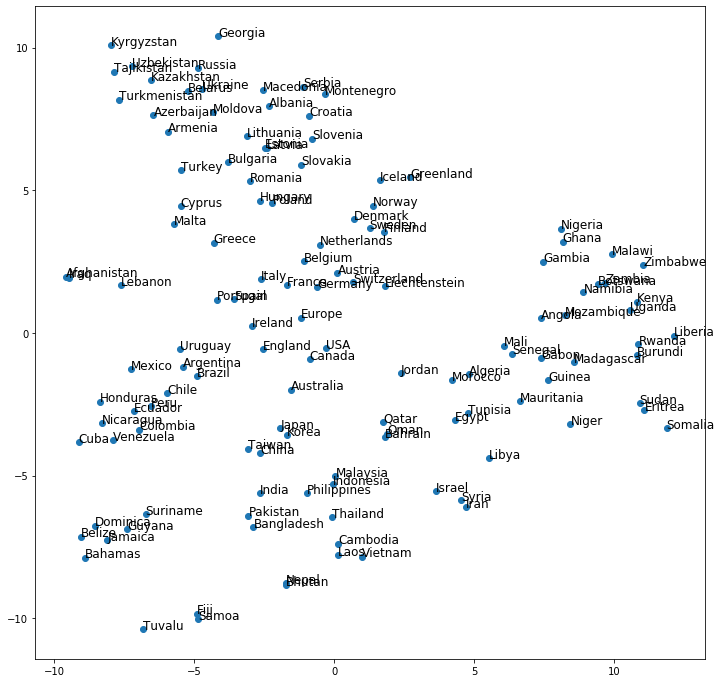

In [117]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.scatter(df_country_vector.x, df_country_vector.y)
for x, y, s in zip(df_country_vector.x, df_country_vector.y, df_country_vector.name):
    ax.text(x, y, s, fontsize=12)

plt.show()